In [2]:
! pip install -q torchview
! pip install -q -U graphviz
!pip install graphviz
!pip install torchviz
from torchview import draw_graph
from torch import nn
import torch
import graphviz
from torchviz import make_dot

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import torch.nn.functional as F

# Define the neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        # Define layers in the neural network
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.drop = nn.Dropout2d(p=0.2)
        self.fc = nn.Linear(in_features=32 * 32 * 24, out_features=num_classes)

    def forward(self, x):
        # Forward pass through the network layers
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = F.dropout(self.drop(x), training=self.training)
        x = x.view(-1, 32 * 32 * 24)
        x = self.fc(x)
        return torch.log_softmax(x, dim=1)


model = Net(num_classes=10)
model = model.to("cpu")

In [4]:
model

Net(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.2, inplace=False)
  (fc): Linear(in_features=24576, out_features=10, bias=True)
)

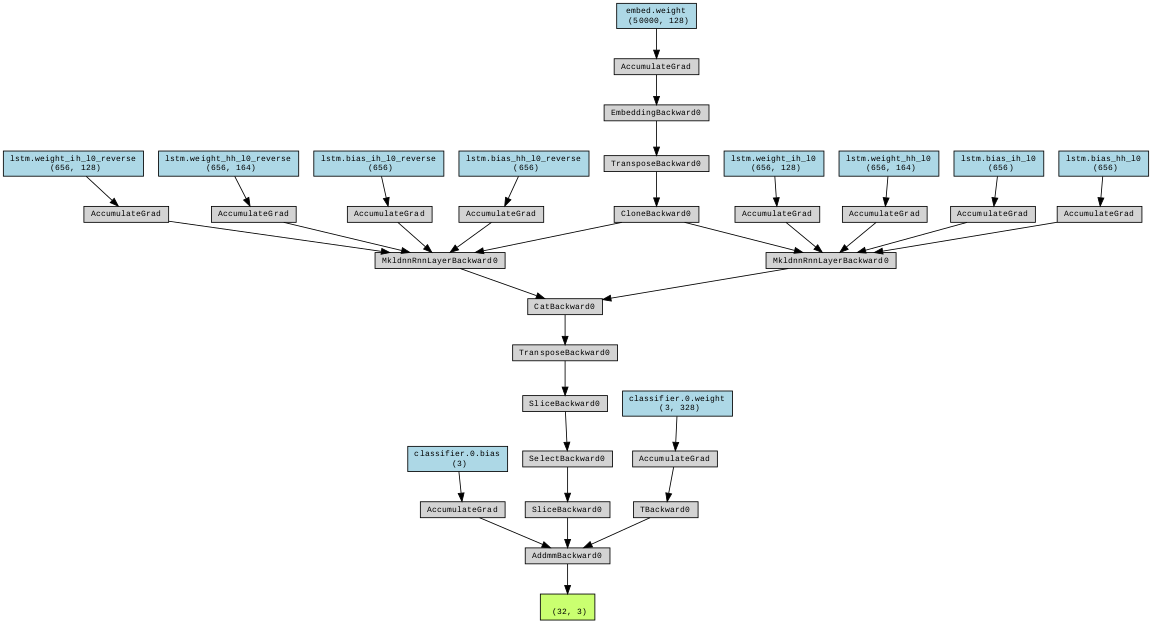

In [2]:
class SentimentAnalysis(torch.nn.Module):

    def __init__(self, total_word, embed_size, hidden_size, num_class, padding_index=0):
        super().__init__()
        self.total_word = total_word
        self.embed_size = embed_size
        self.hidden_size = hidden_size
        self.num_class = num_class

        self.embed = torch.nn.Embedding(num_embeddings=total_word,
                                        embedding_dim=embed_size,
                                        padding_idx=padding_index)
        self.lstm = torch.nn.LSTM(input_size=self.embed_size,
                                  hidden_size=self.hidden_size,
                                  num_layers=1,
                                  bidirectional=True,
                                  batch_first=True)
        self.classifier = torch.nn.Sequential(
            # TODO: add more Linear layer, Activation layer
            torch.nn.Linear(in_features=2*self.hidden_size, out_features=num_class)
        )

    def forward(self, X):
        out = self.embed(X)
        out, _ = self.lstm(out)
        out = self.classifier(out[:, -1, :])
        return out

model = SentimentAnalysis(total_word=50000, embed_size=128, hidden_size=164, num_class=3)
model = model.to("cpu")
x = torch.randint(high=128, size=(32, 128), dtype=torch.long)
y = model(x)
make_dot(y, params=dict(list(model.named_parameters()))).render("torchviz", format="png")
from PIL import Image
from IPython.display import display
img = Image.open('/content/torchviz.png')
display(img)

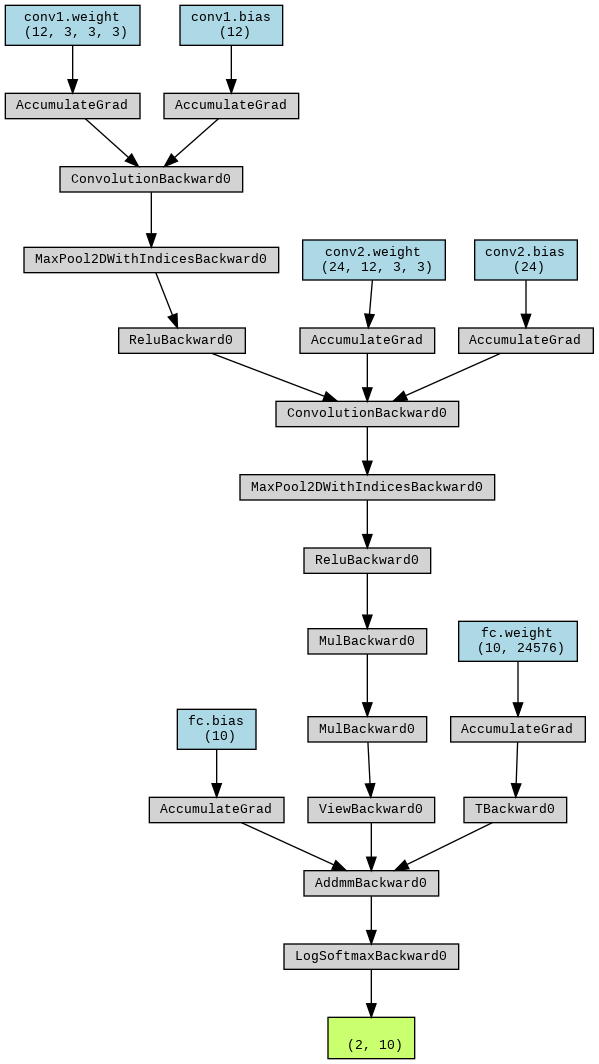

In [3]:
import torch.nn.functional as F

# Define the neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        # Define layers in the neural network
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.drop = nn.Dropout2d(p=0.2)
        self.fc = nn.Linear(in_features=32 * 32 * 24, out_features=num_classes)

    def forward(self, x):
        # Forward pass through the network layers
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = F.dropout(self.drop(x), training=self.training)
        x = x.view(-1, 32 * 32 * 24)
        x = self.fc(x)
        return torch.log_softmax(x, dim=1)


model = Net(num_classes=10)
model = model.to("cpu")

# Generate a random input tensor with the correct shape (32 samples, 3 channels, 32x32 size)
x = torch.rand((32, 3, 32, 32))
y = model(x)
make_dot(y, params=dict(list(model.named_parameters()))).render("torchviz", format="png")
from PIL import Image
from IPython.display import display
img = Image.open('/content/torchviz.png')
display(img)

In [4]:
from transformers import ViTModel, ViTConfig

class ViT(nn.Module):

    def __init__(self, config=ViTConfig(), num_labels=10000,
                 model_checkpoint='google/vit-base-patch16-224-in21k'):

        super(ViT, self).__init__()

        self.vit = ViTModel.from_pretrained(
            model_checkpoint, add_pooling_layer=False)
        self.classifier = (
            nn.Linear(config.hidden_size, num_labels)
        )

    def forward(self, x):

        x = self.vit(x)['last_hidden_state']
        # Use the embedding of [CLS] token
        output = self.classifier(x[:, 0, :])

        return output


model = ViT()
model = model.to("cpu")

# Generate a random input tensor with the correct shape (32 samples, 3 channels, 32x32 size)
x = torch.rand((1, 3, 224, 224))
y = model(x)
make_dot(y, params=dict(list(model.named_parameters()))).render("torchviz", format="png")
from PIL import Image
from IPython.display import display
img = Image.open('/content/torchviz.png')
display(img)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTModel: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (161667792 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
